In [1]:
from project_paths import *

import pandas as pd
import numpy as np
import math
import matplotlib
from matplotlib import pylab as plt

/home/yash/Desktop/Courses/Data1030/Project/news_article_popularity/


#### We analyze how the target variable is related to each feature variable

In [27]:
# Loading lists of continuous and categorical features 
categorical_features = load_list_from_pkl('categorical_features.pkl')
continuous_features = load_list_from_pkl('continuous_features.pkl')

# Loading the data
# read the data
df = pd.read_csv(working_data_csv)
print("Row count:", df.shape[0], "Column count:", df.shape[1])

Row count: 39644 Column count: 61


### A bit of preprocessing here
#### We have the following features in the data:
Set 1:
 - data_channel_is_lifestyle	Is data channel 'Lifestyle'?
 - data_channel_is_entertainment	Is data channel 'Entertainment'?
 - data_channel_is_bus	Is data channel 'Business'?
 - data_channel_is_socmed	Is data channel 'Social Media'?
 - data_channel_is_tech	Is data channel 'Tech'?
 - data_channel_is_world	Is data channel 'World'?

Set 2:
 - weekday_is_monday	Was the article published on a Monday?
 - weekday_is_tuesday	Was the article published on a Tuesday?
 - weekday_is_wednesday	Was the article published on a Wednesday?
 - weekday_is_thursday	Was the article published on a Thursday?
 - weekday_is_friday	Was the article published on a Friday?
 - weekday_is_saturday	Was the article published on a Saturday?
 - weekday_is_sunday	Was the article published on a Sunday?

#### These are features that would normally be contained in 1 category and then encoded as OneHot features during preprocessing. 
#### For ease of visualization, we combine Set 1 into a single feature called 'data_channel' and Set 2 into another feature called 'day_of_week'
#### I verified before hand that there is no overlap in data_channel (i.e. each article falls into exactly one category), or in day_of_week (each article is published on exactly one day)

In [28]:
df_for_viz = df.copy()

def get_day_of_week(x):
    if x['weekday_is_monday']: return 'Monday'
    if x['weekday_is_tuesday']: return 'Tuesday'
    if x['weekday_is_wednesday']: return 'Wednesday'
    if x['weekday_is_thursday']: return 'Thursday'
    if x['weekday_is_friday']: return 'Friday'
    if x['weekday_is_saturday']: return 'Saturday'
    if x['weekday_is_sunday']: return 'Sunday'

df_for_viz['day_of_week'] = df_for_viz.apply(lambda x: get_day_of_week(x), axis=1)
df_for_viz = df_for_viz.drop(labels=['weekday_is_monday', 
                                    'weekday_is_tuesday', 
                                    'weekday_is_wednesday', 
                                    'weekday_is_thursday', 
                                    'weekday_is_friday', 
                                    'weekday_is_saturday', 
                                    'weekday_is_sunday'], axis=1)

def get_data_channel(x):
    if x['data_channel_is_lifestyle']: return 'Lifestyle'
    if x['data_channel_is_entertainment']: return 'Entertainment'
    if x['data_channel_is_bus']: return 'Business'
    if x['data_channel_is_socmed']: return 'Social Media'
    if x['data_channel_is_tech']: return 'Tech'
    if x['data_channel_is_world']: return 'World'
    return 'No_data_channel'

df_for_viz['data_channel'] = df_for_viz.apply(lambda x: get_data_channel(x), axis=1)
df_for_viz = df_for_viz.drop(labels=['data_channel_is_lifestyle', 
                                    'data_channel_is_entertainment', 
                                    'data_channel_is_bus', 
                                    'data_channel_is_socmed', 
                                    'data_channel_is_tech', 
                                    'data_channel_is_world'], axis=1)

df_for_viz['data_channel'].head()

0    Entertainment
1         Business
2         Business
3    Entertainment
4             Tech
Name: data_channel, dtype: object

In [29]:
removed_features = ['weekday_is_monday', 
                    'weekday_is_tuesday', 
                    'weekday_is_wednesday', 
                    'weekday_is_thursday', 
                    'weekday_is_friday', 
                    'weekday_is_saturday', 
                    'weekday_is_sunday',
                    'data_channel_is_lifestyle', 
                    'data_channel_is_entertainment', 
                    'data_channel_is_bus', 
                    'data_channel_is_socmed', 
                    'data_channel_is_tech', 
                    'data_channel_is_world']
added_features = ['day_of_week', 'data_channel']
categorical_features = [x for x in categorical_features if x not in removed_features]
categorical_features += added_features

### 1. We first view the relationships between the features vs the target by viewing the **target as a continuous variable** (no of shares)

#### 1.1 First, we can view scatter plots of the continuous features vs the target (scatter plot)

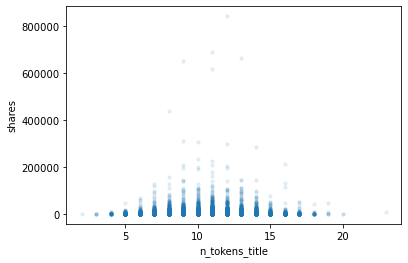

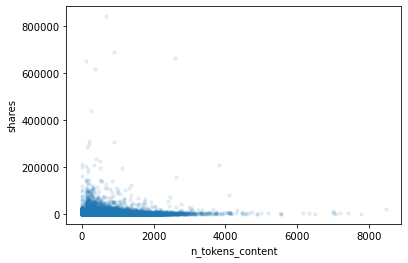

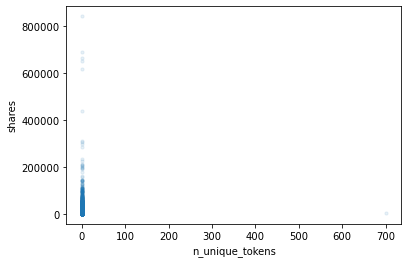

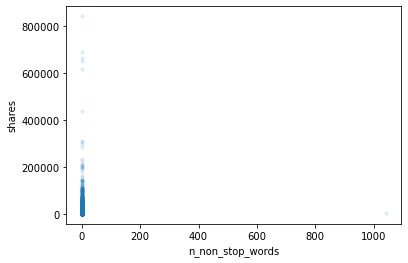

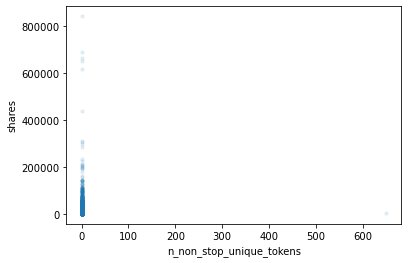

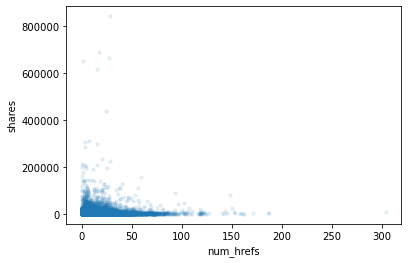

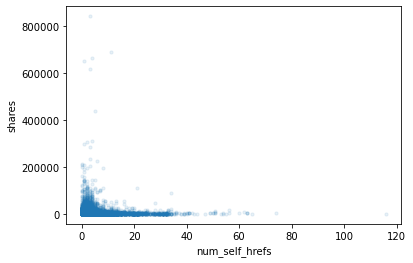

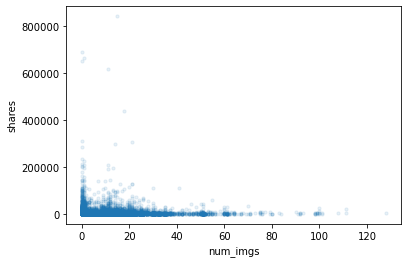

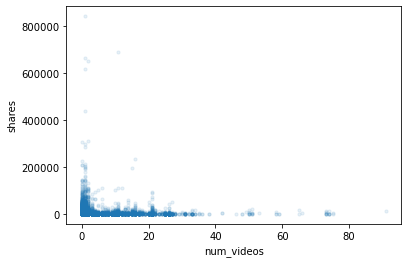

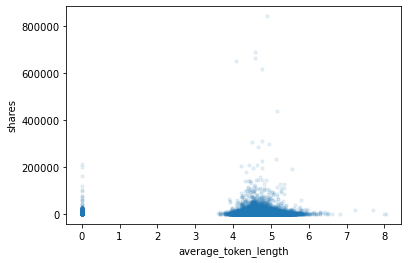

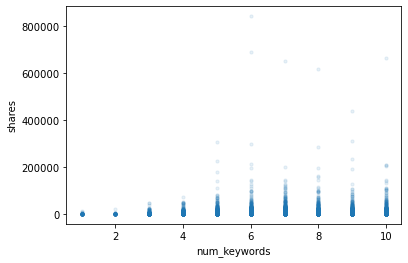

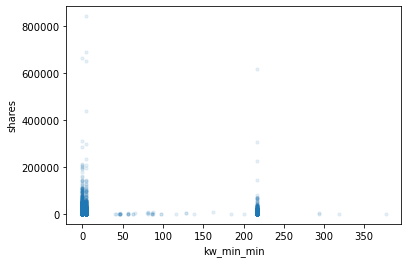

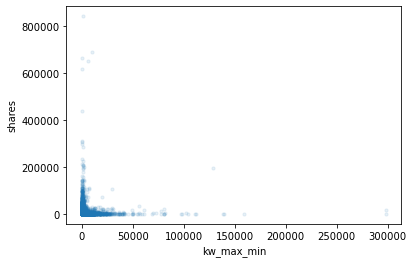

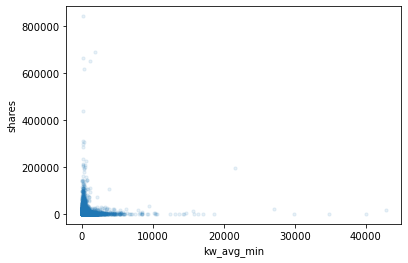

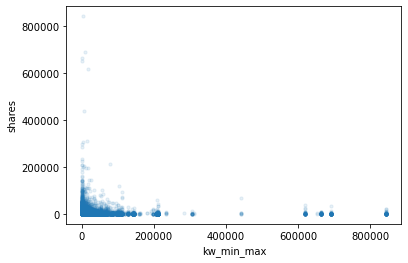

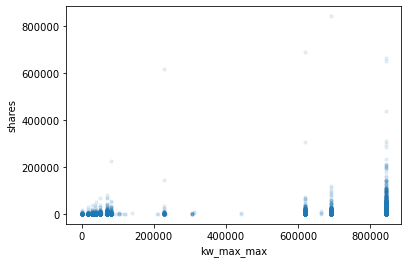

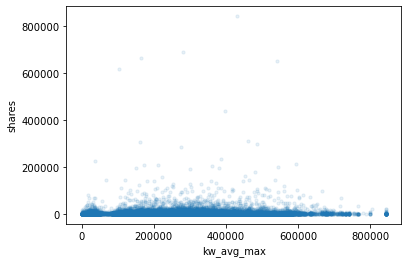

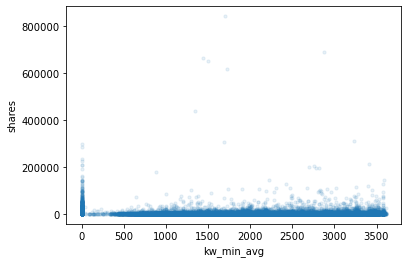

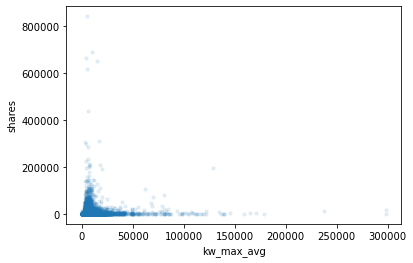

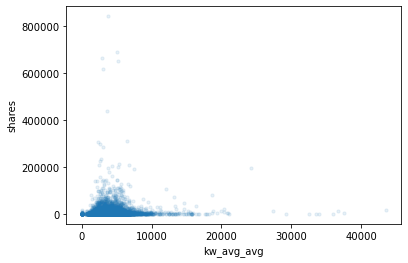

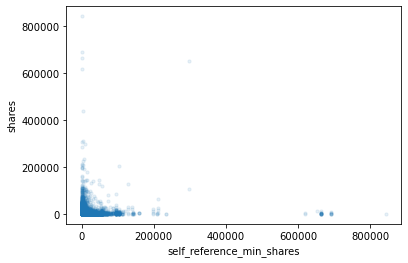

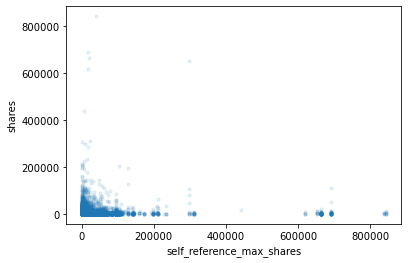

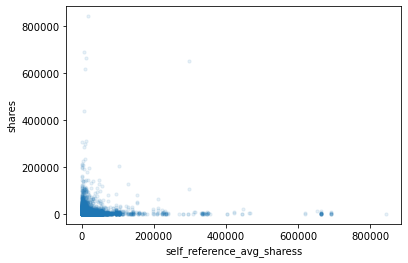

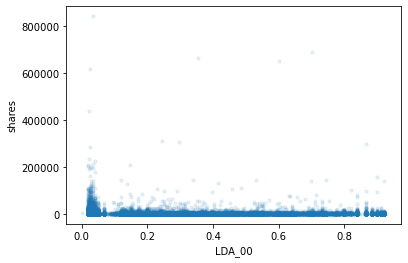

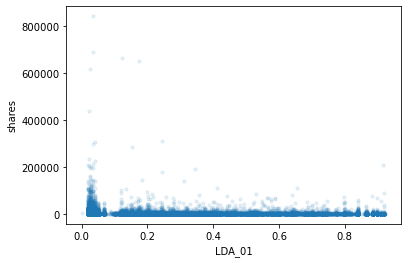

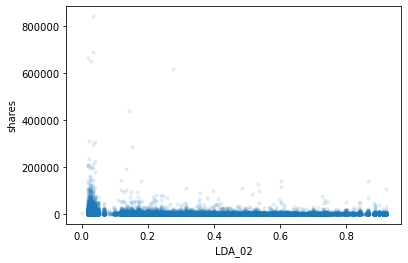

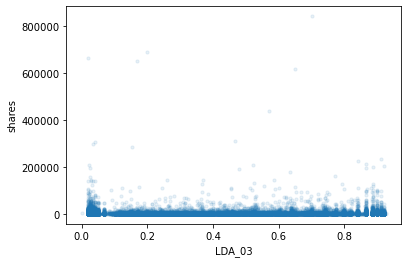

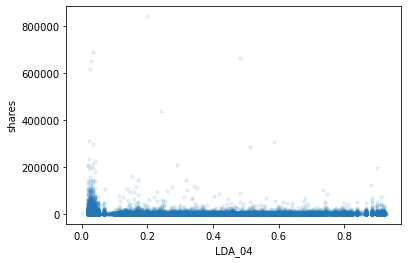

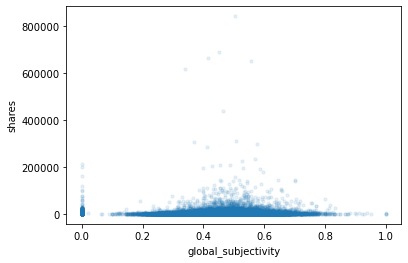

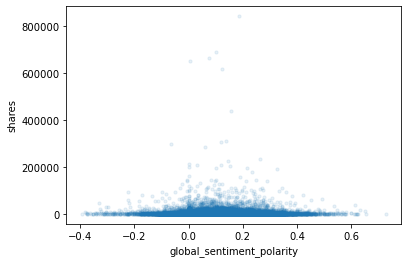

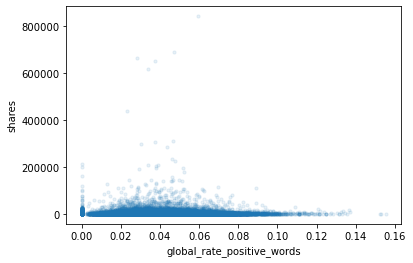

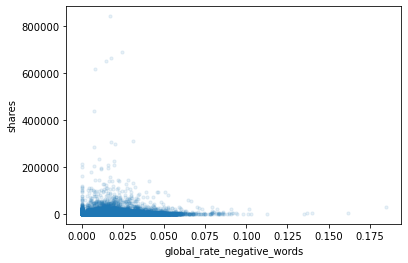

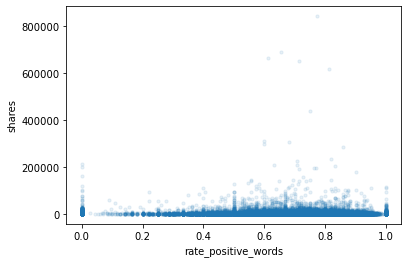

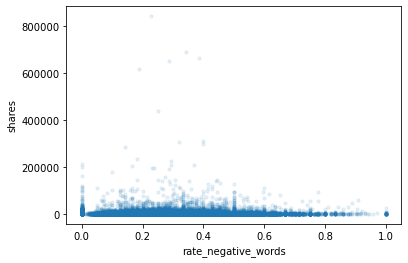

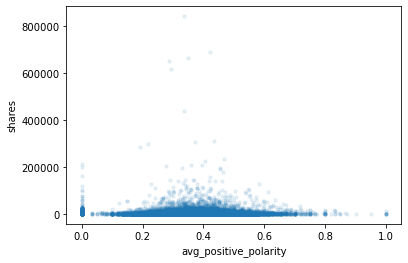

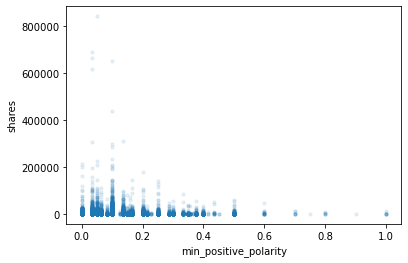

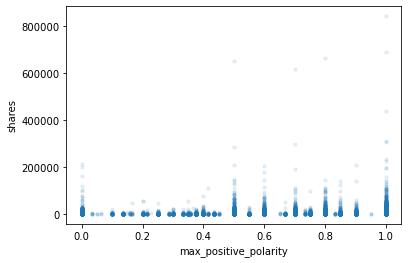

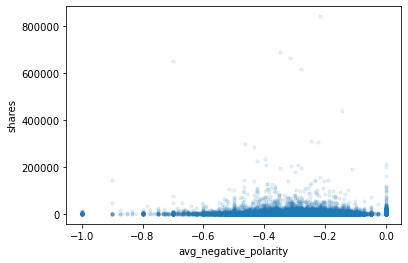

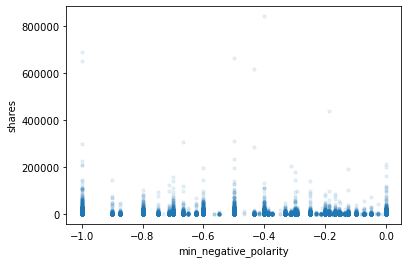

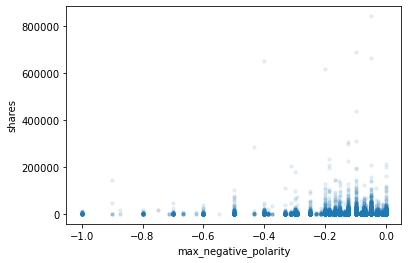

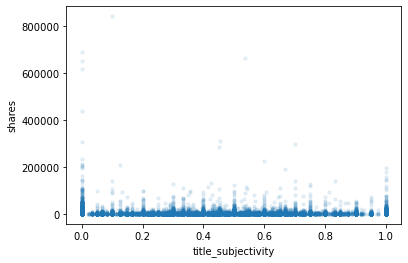

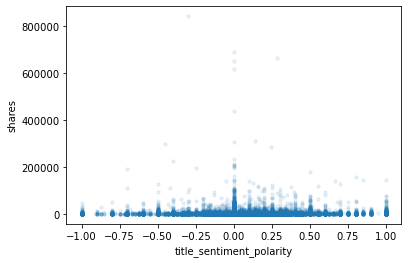

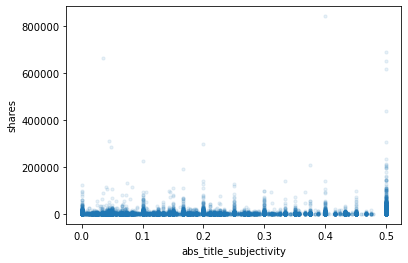

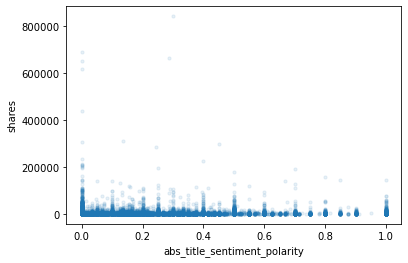

In [24]:
for f in continuous_features:
    df_for_viz.plot.scatter(f, 'shares', s=10, alpha=0.1)
    plt.show()

#### 1.2 Then, we can view scatter plots of the categorical features vs the target (box plot/violin plot)

In [49]:
def box_plot(df, col):
    df[[col,'shares']].boxplot(by=col)
    plt.ylabel('shares')
    plt.xlabel(col)
    plt.show()

def violin_plot(df, col):
    unique_vals = df[col].dropna().unique()
    dataset = [df[df[col]==val]["shares"].values for val in unique_vals]
    plt.violinplot(dataset = dataset)
    plt.xticks(range(1,len(unique_vals)+1),unique_vals)
    plt.ylabel(col)
    plt.show()


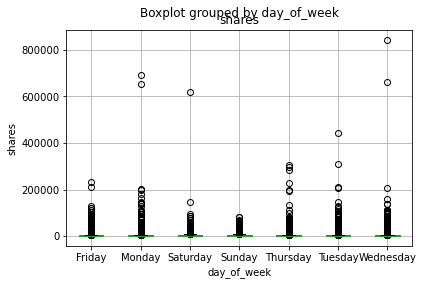

In [51]:
col = 'day_of_week'
columns_my_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

df_for_viz[[col,'shares']].boxplot(by=col)
plt.ylabel('shares')
plt.xlabel(col)
plt.show()

# TBD: SORT BY DAY OF WEEK

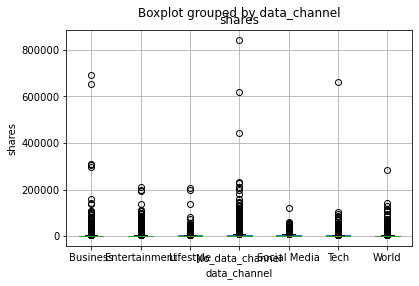

In [37]:
col = 'data_channel'
df_for_viz[[col,'shares']].boxplot(by=col)
plt.ylabel('shares')
plt.xlabel(col)
plt.show()

### 2. Now, we view the relationships between the features vs the target by viewing the **target as a categorical variable** (whether the article was popular or not)

#### 2.1 We can view scatter plots of the continuous features vs the target (category-specific histograms/box plot/violin plot)

In [56]:
threshold = 1400
df_for_viz['shares_cat'] = df_for_viz['shares'].apply(lambda x: 1 if x > 1400 else 0)
# df_for_viz[['shares', 'shares_cat']].head(20)

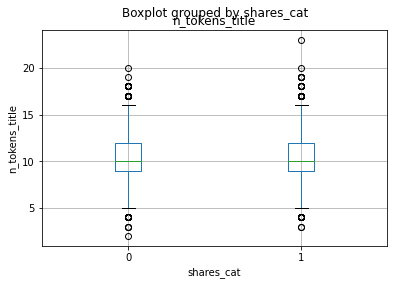

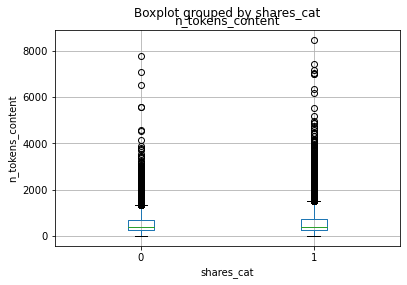

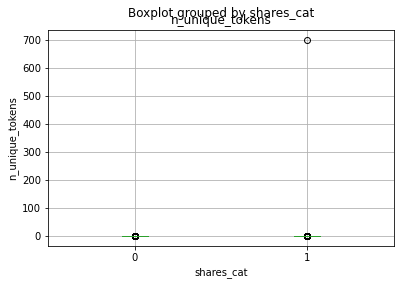

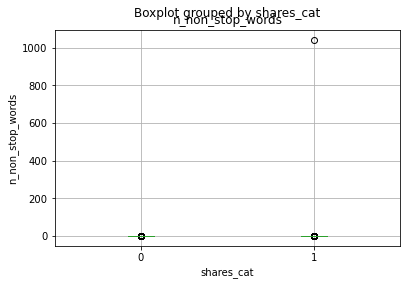

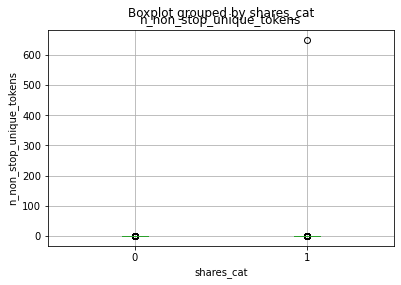

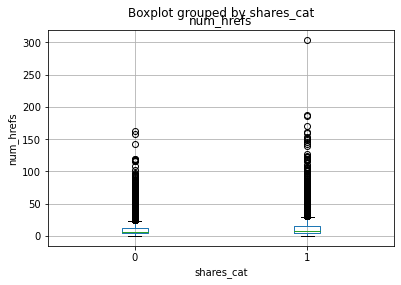

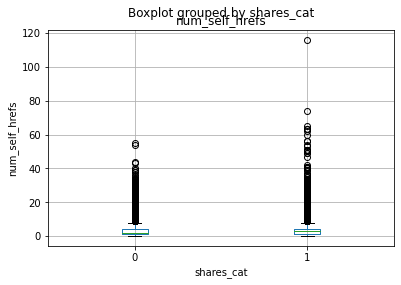

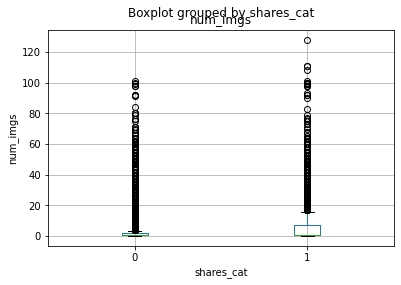

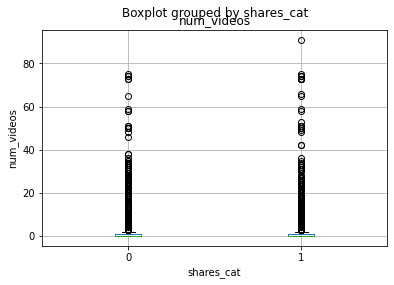

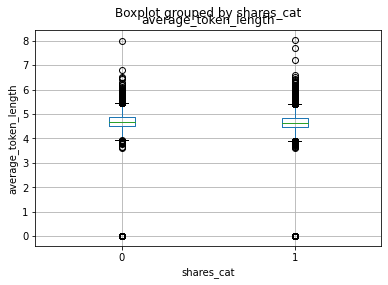

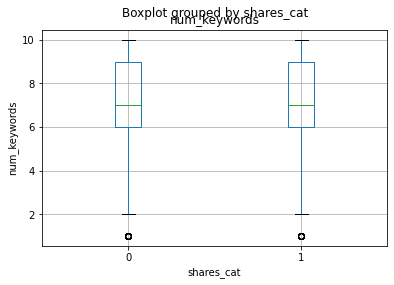

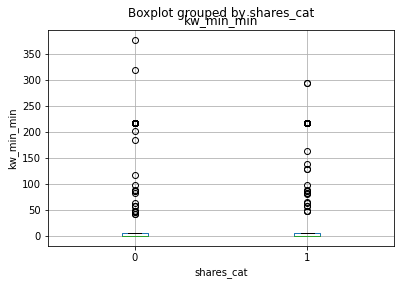

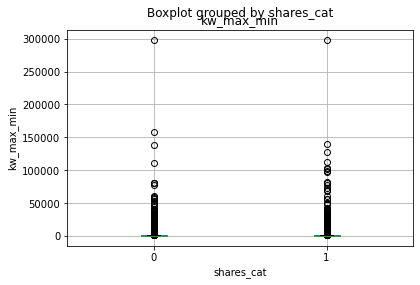

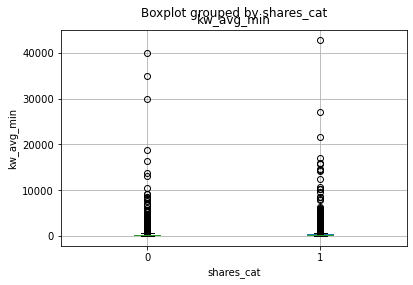

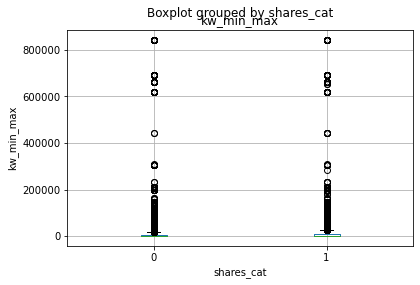

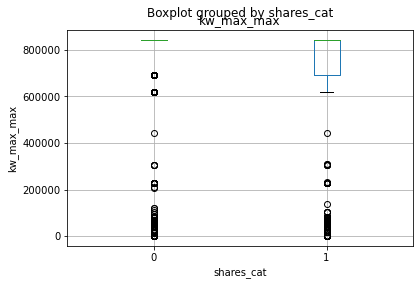

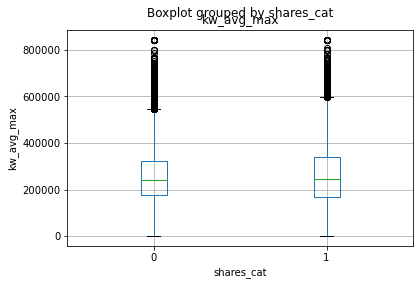

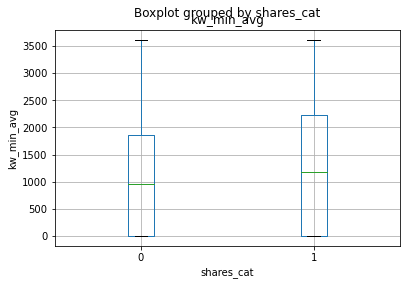

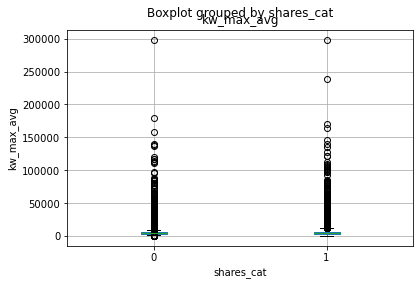

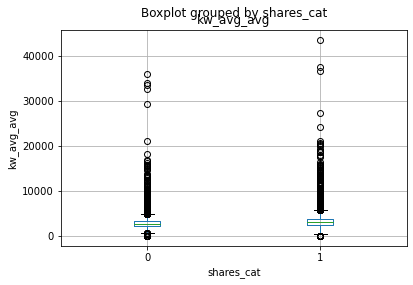

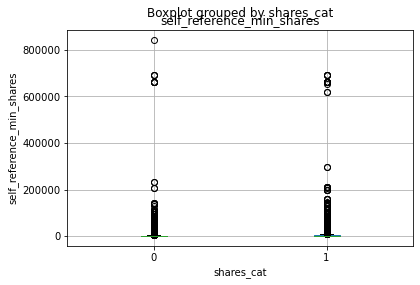

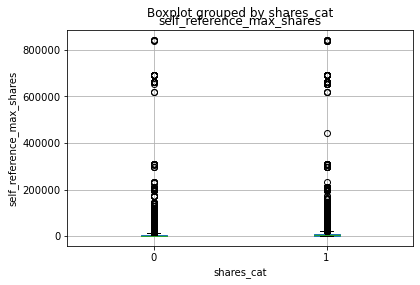

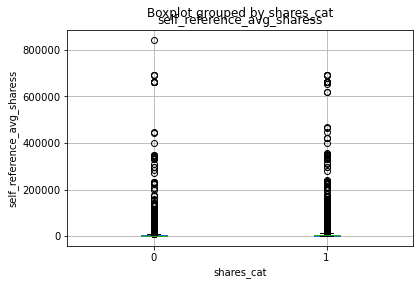

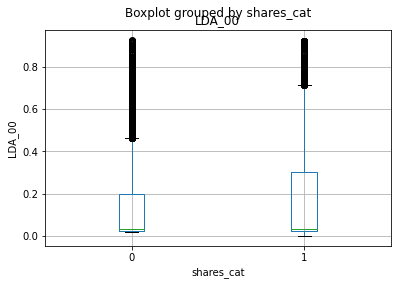

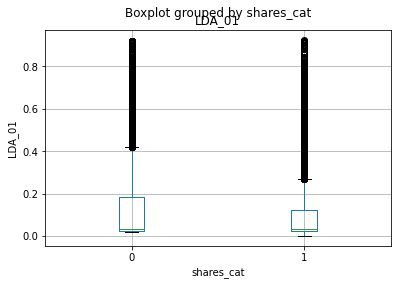

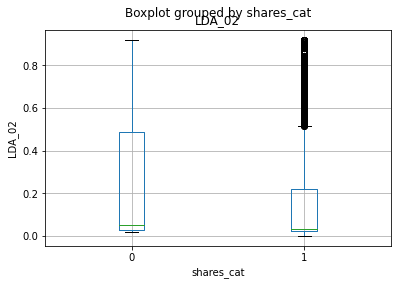

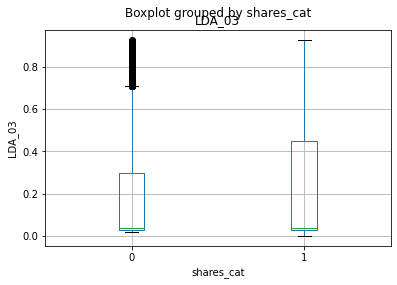

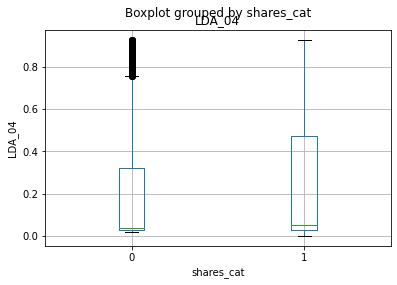

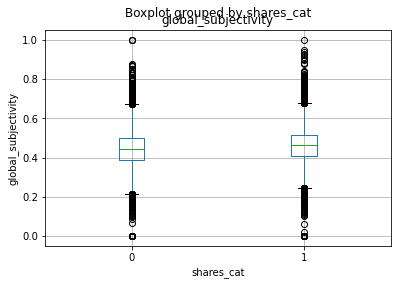

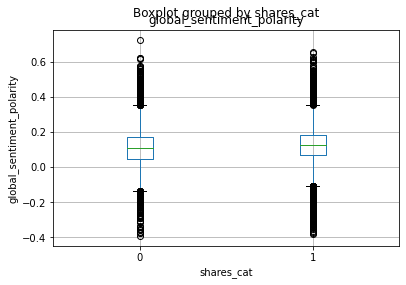

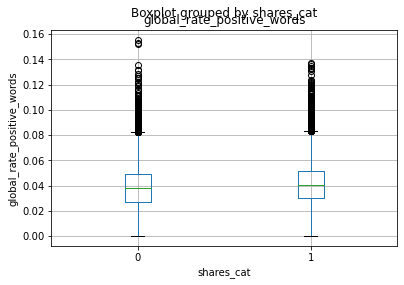

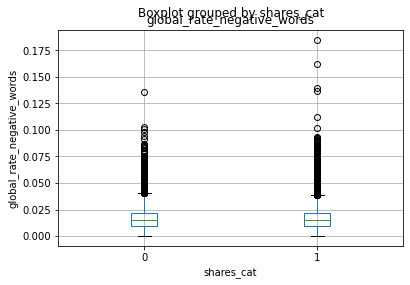

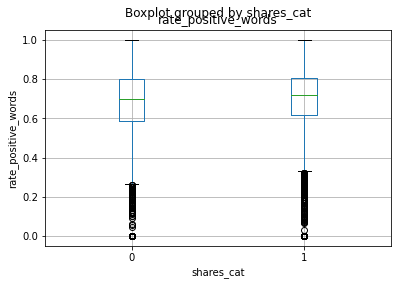

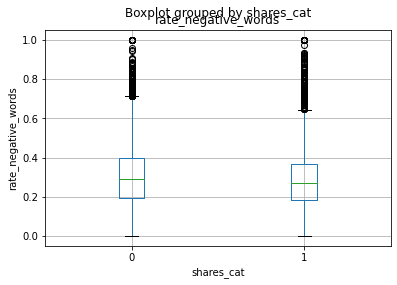

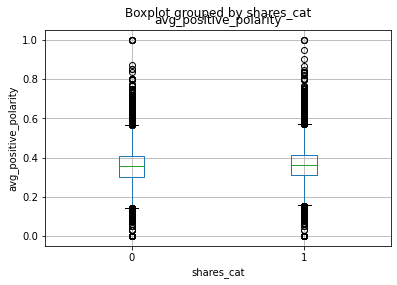

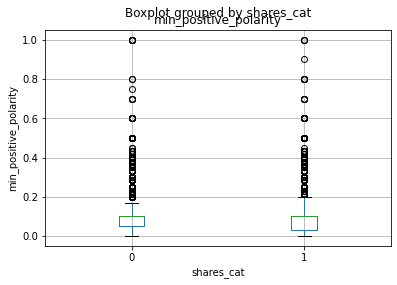

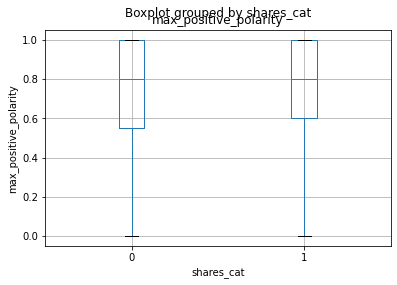

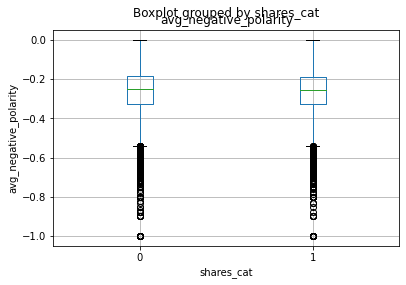

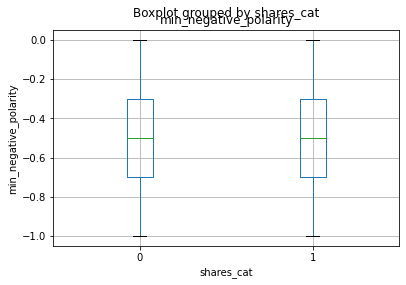

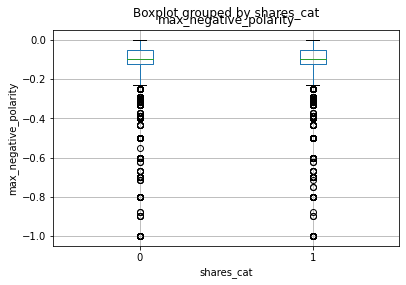

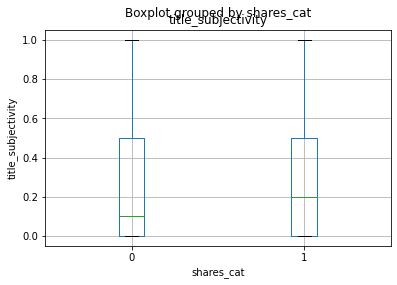

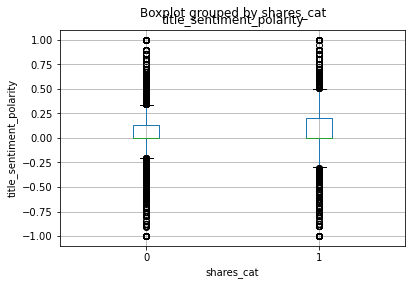

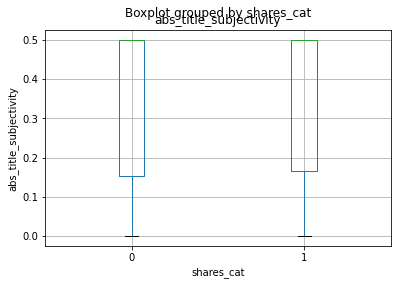

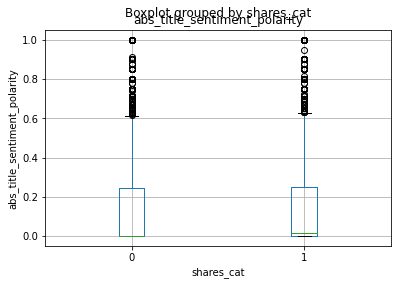

In [60]:
for f in continuous_features:
    df_for_viz[[f,'shares_cat']].boxplot(by='shares_cat')
    plt.ylabel(f)
    plt.xlabel('shares_cat')
    plt.show()

#### 2.2 Finally, we can view scatter plots of the categorical features vs the target (stacked bar plot)

In [61]:
def plot_stacked_bar(df, col):
    count_matrix = df.groupby([col, 'shares_cat']).size().unstack()
    count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
    count_matrix_norm.plot(kind='bar', stacked=True)
    plt.ylabel('Fraction of articles in group')
    # plt.xlabel('Fraction of articles in group')
    plt.legend(loc=4)
    plt.show()


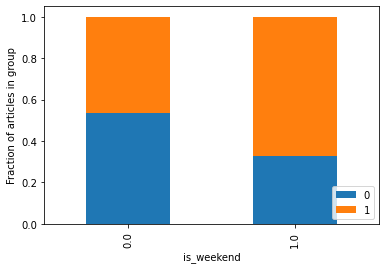

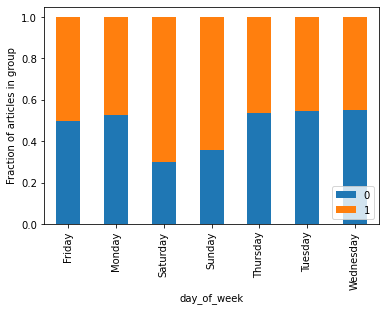

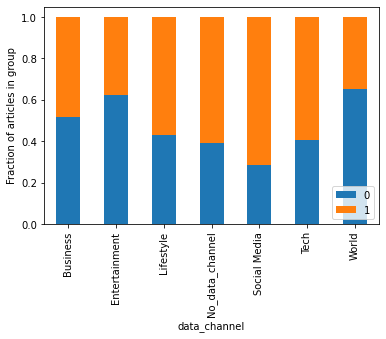

In [63]:
for f in categorical_features:
    plot_stacked_bar(df_for_viz, f)